In [2]:
# import matplotlib.pyplot as plt
# from ultralytics import YOLO
# import cv2
# import google.generativeai as genai
# from PIL import Image, ImageDraw, ImageFont
# import numpy as np
# import time
# import os
from projectaria_tools.core import data_provider, calibration
import projectaria_tools.core.mps as mps
from projectaria_tools.core import data_provider
from projectaria_tools.core.stream_id import StreamId
from projectaria_tools.core.mps.utils import (
    get_gaze_vector_reprojection,
    get_nearest_eye_gaze
)
# import glob
from projectaria_tools.core.mps.utils import get_nearest_wrist_and_palm_pose
# import pandas as pd
import numpy as np
import cv2


In [3]:
gaze_cpf = mps.read_eyegaze('C:/Users/athen/Desktop/Github/MastersThesis/sampledata/sample3/mps_Driving_Profile_Test_vrs/eye_gaze/general_eye_gaze.csv')
handwrist_points  = mps.hand_tracking.read_wrist_and_palm_poses('C:/Users/athen/Desktop/Github/MastersThesis/sampledata/sample3/mps_Driving_Profile_Test_vrs/hand_tracking/wrist_and_palm_poses.csv')


timestamps = np.linspace(119.521, 136.771, 346)

res = {}

for t in timestamps:
  tns = t * 1e9

  wrist_and_palm_pose = get_nearest_wrist_and_palm_pose(handwrist_points, tns)

  if wrist_and_palm_pose is not None:
    left_pose_confidence = wrist_and_palm_pose.left_hand.confidence
    left_wrist_position_device = wrist_and_palm_pose.left_hand.wrist_position_device
    left_palm_position_device = wrist_and_palm_pose.left_hand.palm_position_device
    left_wrist_normal_device = wrist_and_palm_pose.left_hand.wrist_and_palm_normal_device.wrist_normal_device

    res[t] = {
      'left_pose_confidence': left_pose_confidence,
      'left_wrist_position_device': left_wrist_position_device,
      'left_palm_position_device': left_palm_position_device,
      'left_wrist_normal_device': left_wrist_normal_device
    }





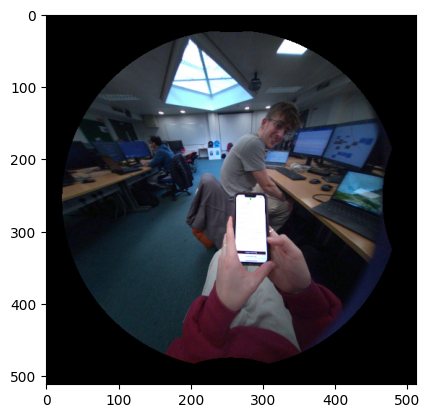

In [17]:
from projectaria_tools.core.calibration import (
    device_calibration_from_json_string,
    distort_by_calibration,
    get_linear_camera_calibration,
)
import matplotlib.pyplot as plt
import numpy as np
import cv2
from projectaria_tools.core.image import InterpolationMethod

# Load image and calibration

path = 'C:/Users/athen/Desktop/Github/MastersThesis/sampledata/imagetesting/facetest.jpg'
samp = cv2.imread(path)

#float32


with open('C:/Users/athen/Desktop/Github/MastersThesis/MSc_AI_Thesis/Coding/other/calibration.json') as f:
    sc = f.read()


sensors_calib = device_calibration_from_json_string(sc)
rgb_calib = sensors_calib.get_camera_calib("camera-rgb")
dst_calib = get_linear_camera_calibration(512, 512, 150, "camera-rgb")

# for img in rgb_images:

undistorted_rgb_image = distort_by_calibration(
                samp, dst_calib, rgb_calib,
                InterpolationMethod.BILINEAR
            )

plt.imshow(cv2.cvtColor(undistorted_rgb_image, cv2.COLOR_BGR2RGB))
plt.show()
        
